In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
Amazon_sale = pd.read_csv("Amazon Sale Report.csv", parse_dates = ['Date'])
Amazon_sale['Sales'] = Amazon_sale['Qty'] * Amazon_sale['Amount']
Amazon_sale.head()

C:\Users\ankit\AppData\Local\Temp\ipykernel_5640\3458144991.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  Amazon_sale = pd.read_csv("Amazon Sale Report.csv", parse_dates = ['Date'])
C:\Users\ankit\AppData\Local\Temp\ipykernel_5640\3458144991.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Amazon_sale = pd.read_csv("Amazon Sale Report.csv", parse_dates = ['Date'])


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22,Sales
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN,0.0
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN,406.0
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN,329.0
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN,0.0
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN,574.0


In [15]:
#Removed index column from main table with unnecessary columns which we dont need,you can make Index_col="Index" as your main index.

Amazon_sale.drop(['Unnamed: 22', 'fulfilled-by','promotion-ids','index'], axis=1, inplace=True)

In [4]:
Amazon_sale.head(3)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,Sales
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,0.0
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,406.0
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,329.0


In [9]:
Amazon_sale.head(3)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,Sales
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,Shipped,1,INR,406.0,BENGALURU,KARNATAKA,560085.0,IN,False,406.0
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,329.0
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,Shipped,1,INR,574.0,CHENNAI,TAMIL NADU,600073.0,IN,False,574.0


In [16]:
#now removed Null values from data with any duplicates value available in dataset

Amazon_sale.dropna(inplace=True)
Amazon_sale.drop_duplicates(inplace=True)

In [17]:
Amazon_sale.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116013 entries, 1 to 128974
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            116013 non-null  object        
 1   Date                116013 non-null  datetime64[ns]
 2   Status              116013 non-null  object        
 3   Fulfilment          116013 non-null  object        
 4   Sales Channel       116013 non-null  object        
 5   ship-service-level  116013 non-null  object        
 6   Style               116013 non-null  object        
 7   SKU                 116013 non-null  object        
 8   Category            116013 non-null  object        
 9   Size                116013 non-null  object        
 10  ASIN                116013 non-null  object        
 11  Courier Status      116013 non-null  object        
 12  Qty                 116013 non-null  int64         
 13  currency            116013 non-nul

In [18]:
Amazon_sale.describe()
Amazon_sale[['Qty','Amount']].describe()

,Qty,Amount
count,116013.000000,116013.000000
mean,1.003775,649.774939
std,0.072652,282.647046
min,1.000000,0.000000
25%,1.000000,449.000000
50%,1.000000,606.000000
75%,1.000000,788.000000
max,8.000000,5584.000000


In [19]:
Amazon_sale['Category'].unique()

array(['kurta', 'Top', 'Set', 'Western Dress', 'Ethnic Dress', 'Bottom',
       'Saree', 'Blouse', 'Dupatta'], dtype=object)

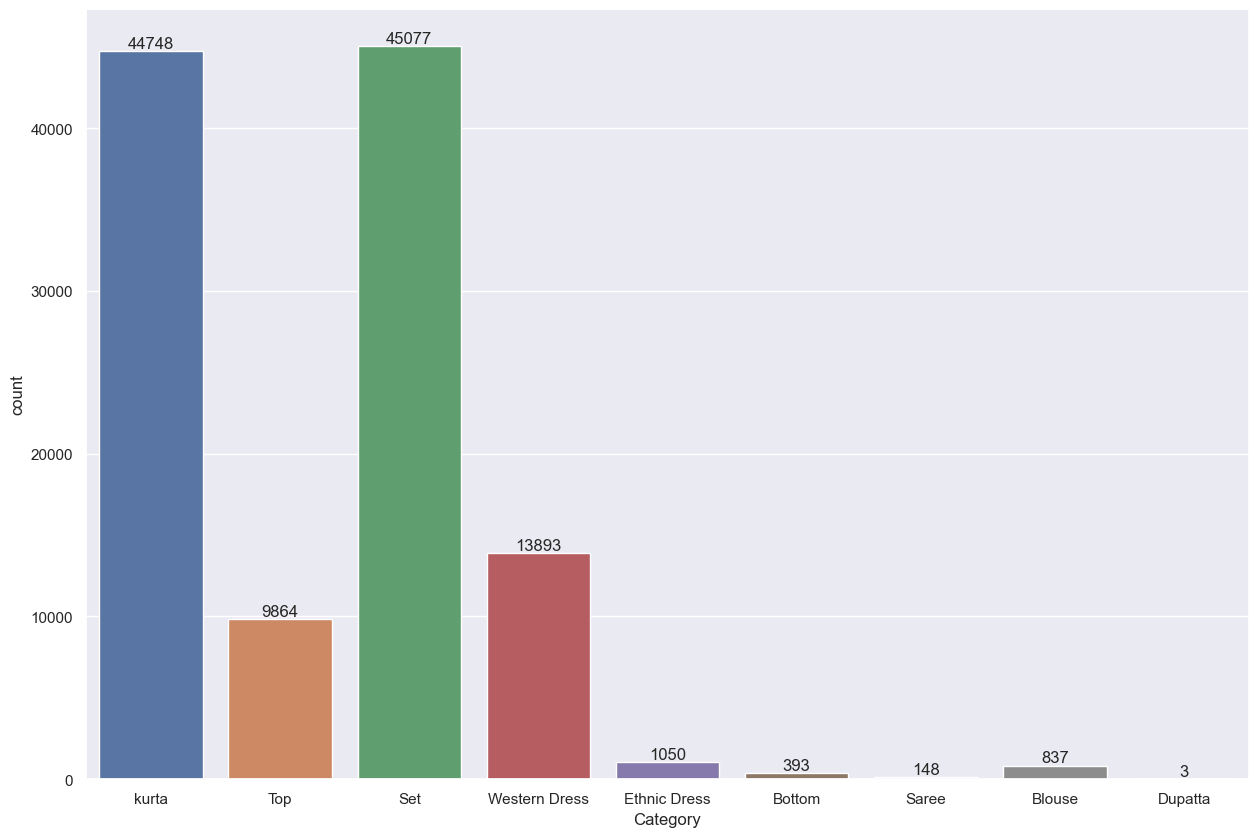

In [21]:
ax = sns.countplot(x ='Category', data = Amazon_sale)
sns.set(rc={'figure.figsize':(15,10)})

for bars in ax.containers:
    ax.bar_label(bars)

From this bar graph we could know which product have more number of sales.


Text(0.5, 1.0, 'Total Sales Amount by Category')

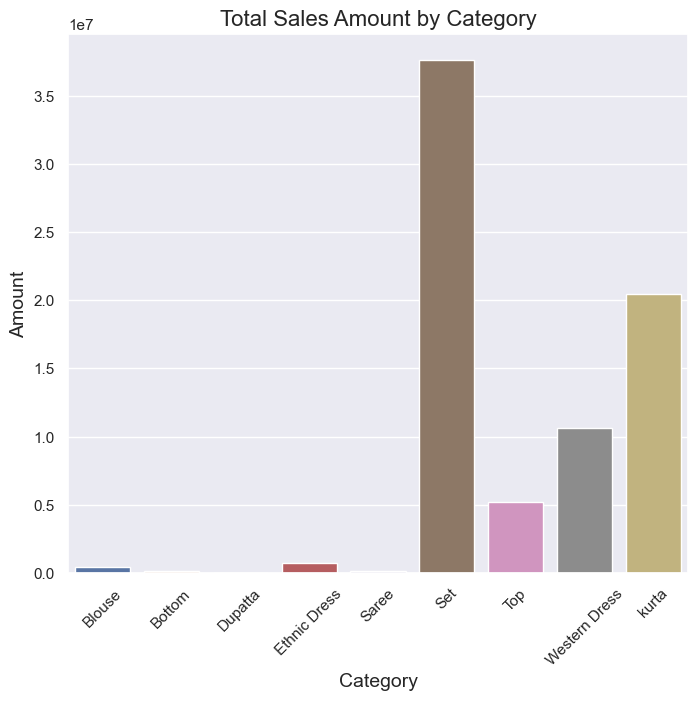

In [22]:
category_sale = Amazon_sale.groupby(['Category'], as_index=False)['Amount'].sum()
sns.set(rc={'figure.figsize':(8,7)})

sns.barplot(x = 'Category', y= 'Amount', data = category_sale)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
    
    plt.xticks(rotation=45)
    plt.xlabel('Category', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.title('Total Sales Amount by Category', fontsize=16)

As shown in this graph, Whole set of clothing has more revenue coming from compare to other products followed by Tops and Western Dress

In [23]:
 Amazon_sale.groupby(['Category'], as_index=False)['Amount'].sum().sort_values('Amount', ascending=False)

,Category,Amount
5,Set,37651374.0
8,kurta,20444740.0
7,Western Dress,10628361.0
6,Top,5202753.0
3,Ethnic Dress,760711.0
0,Blouse,434751.0
1,Bottom,140226.0
4,Saree,118509.0
2,Dupatta,915.0


In [24]:
Amazon_sale.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'B2B', 'Sales'],
      dtype='object')

In [25]:
Amazon_sale['Status'].unique()

array(['Shipped - Delivered to Buyer', 'Shipped', 'Cancelled',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged'], dtype=object)

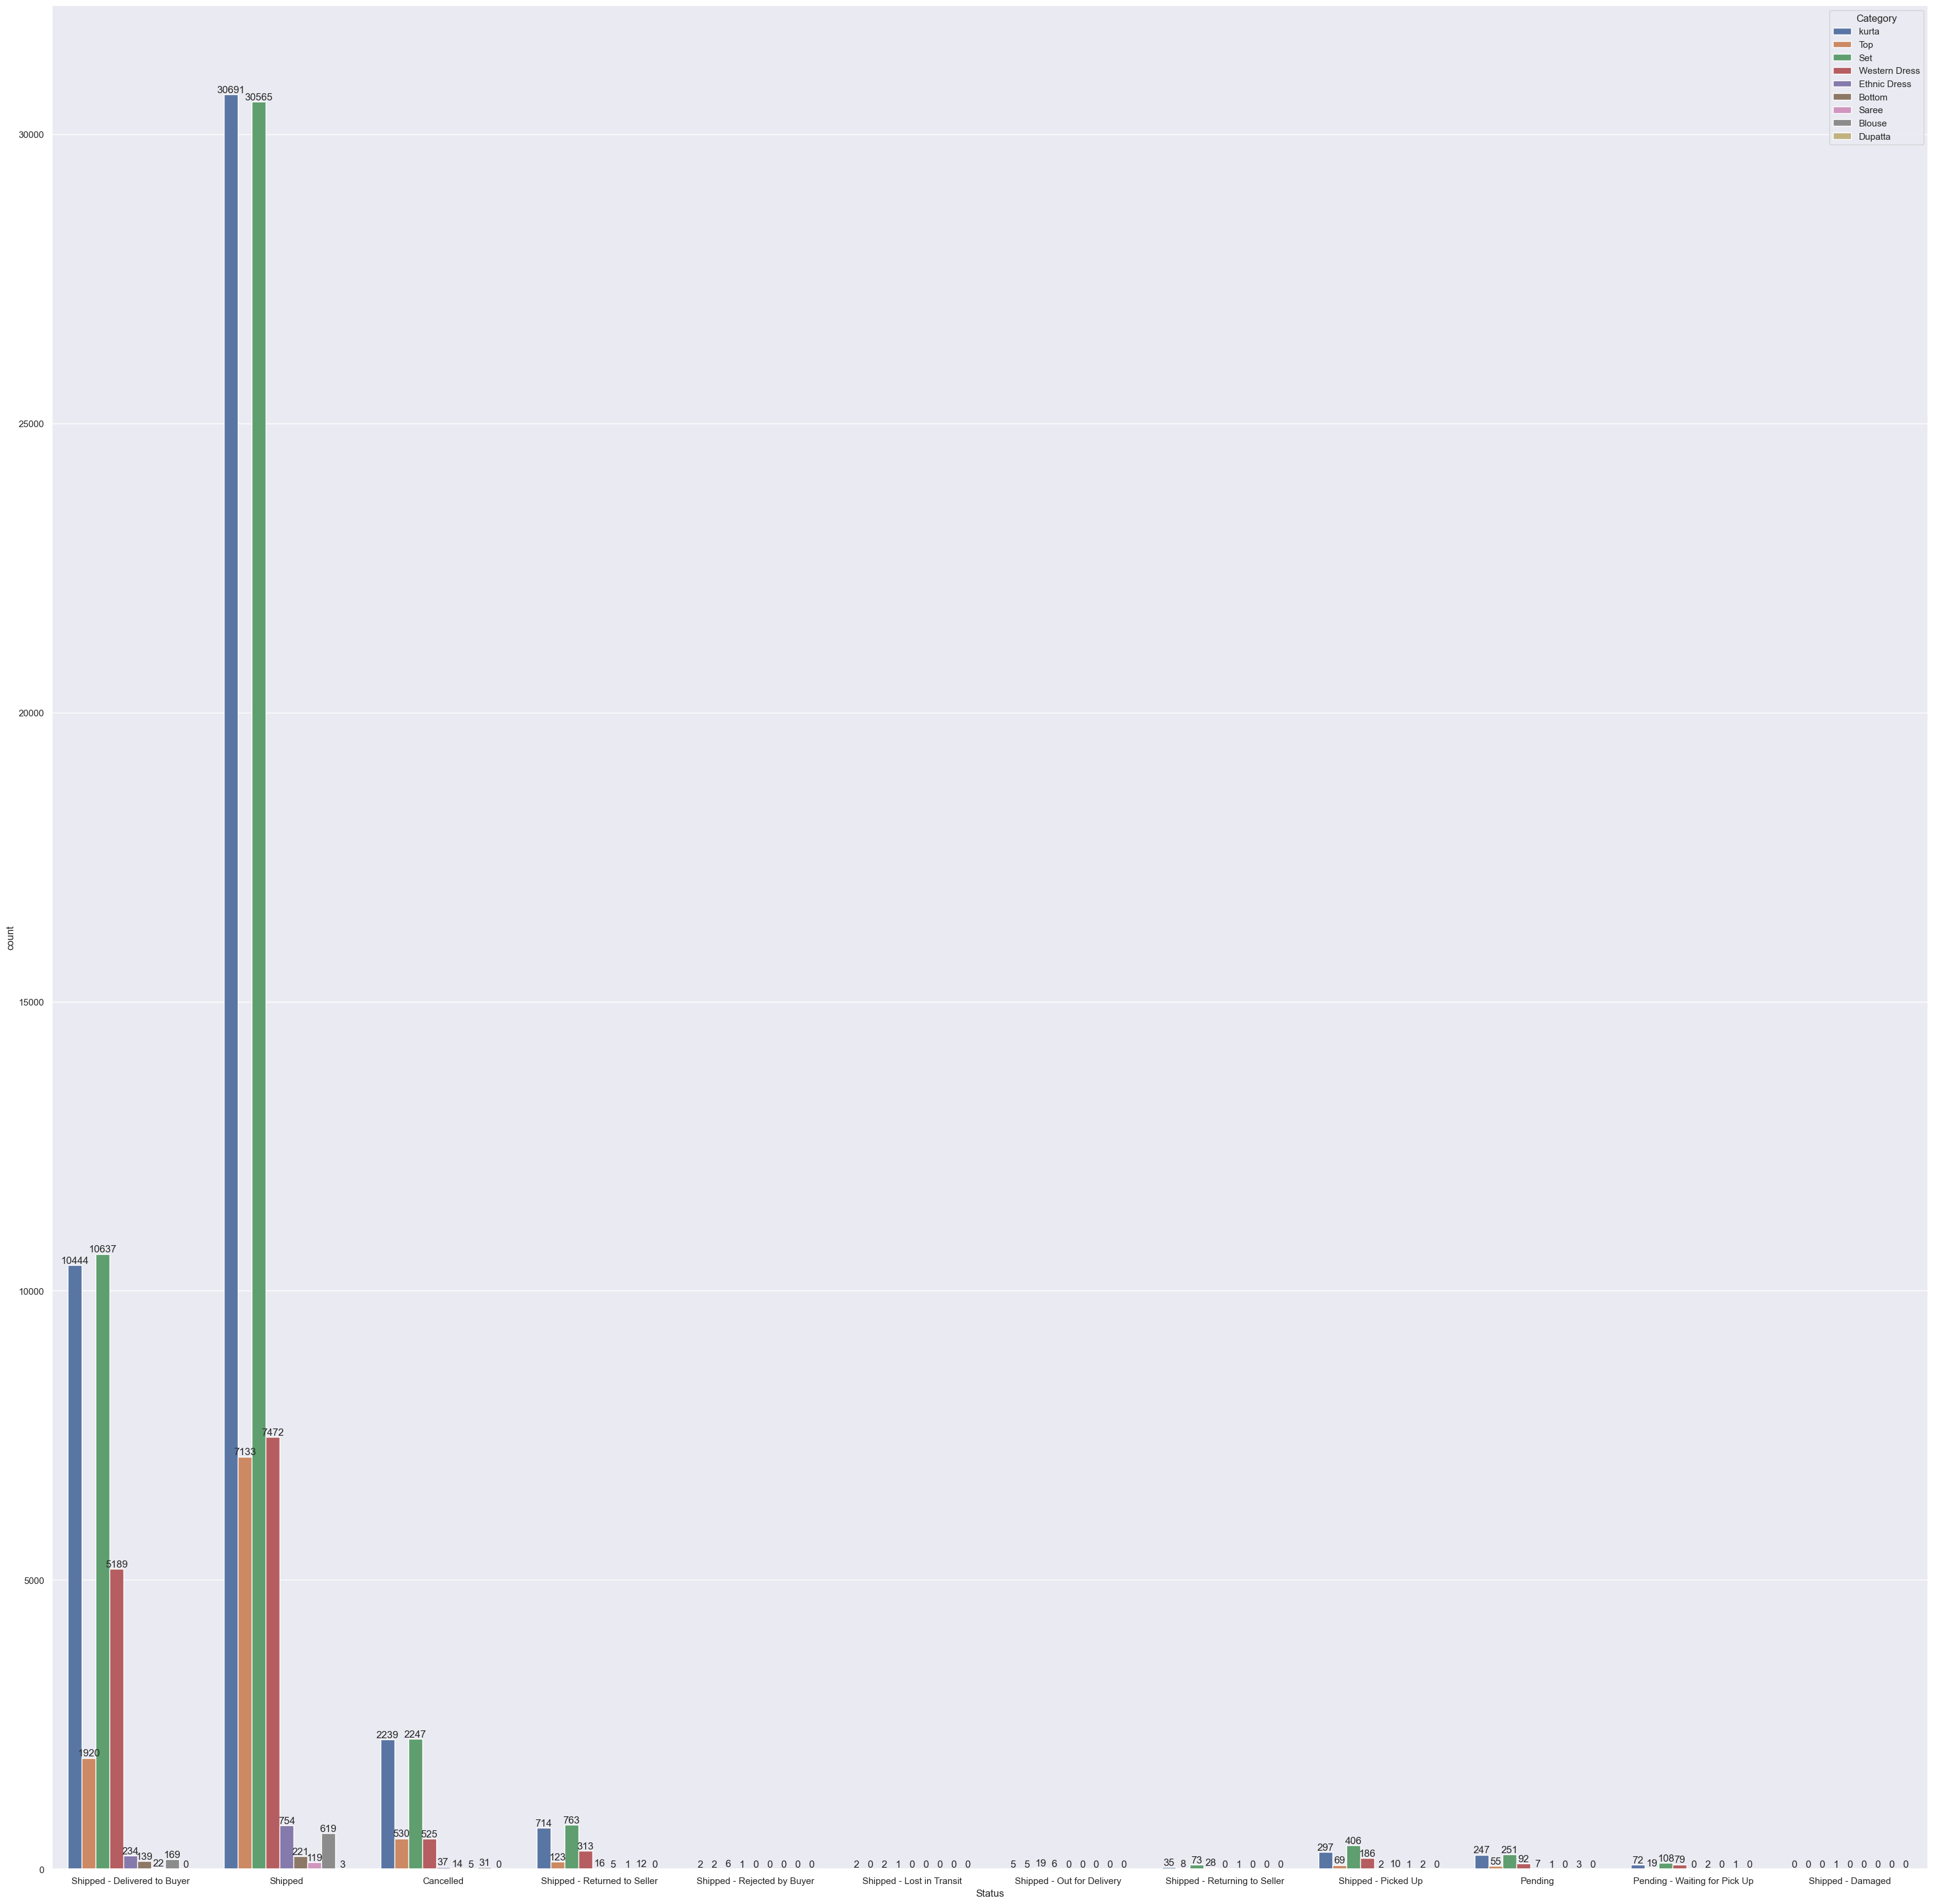

In [27]:
ax = sns.countplot(x ='Status', data = Amazon_sale, hue = 'Category')
sns.set(rc={'figure.figsize':(40,40)})

for bars in ax.containers:
    ax.bar_label(bars)

Gives us shipping status of each product category from 22-04 to 22-06

In [28]:
product_lifecycle = Amazon_sale.groupby('ASIN')['Date'].agg(['min', 'max'])

In [30]:
product_lifecycle

,min,max
ASIN,,
B01LYC0N7Q,2022-04-02,2022-06-29
B01LYC0NV1,2022-04-06,2022-06-16
B01LZMXYSV,2022-04-08,2022-06-24
B01LZYQ93J,2022-04-09,2022-06-23
B01M0LXTZE,2022-04-14,2022-06-23
...,...,...
B0B4992J2M,2022-06-22,2022-06-22
B0B4994HY6,2022-06-22,2022-06-22
B0B499JD9S,2022-06-21,2022-06-21


Analyze the lifecycle of each product by looking at the first and last purchase dates to understand when products were introduced and phased out.

In [31]:
Amazon_sale['Day'] = Amazon_sale['Date'].dt.day

In [32]:
Amazon_sale.head(3)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,Sales,Day
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,1,INR,406.0,BENGALURU,KARNATAKA,560085.0,IN,False,406.0,30
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,329.0,30
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,1,INR,574.0,CHENNAI,TAMIL NADU,600073.0,IN,False,574.0,30


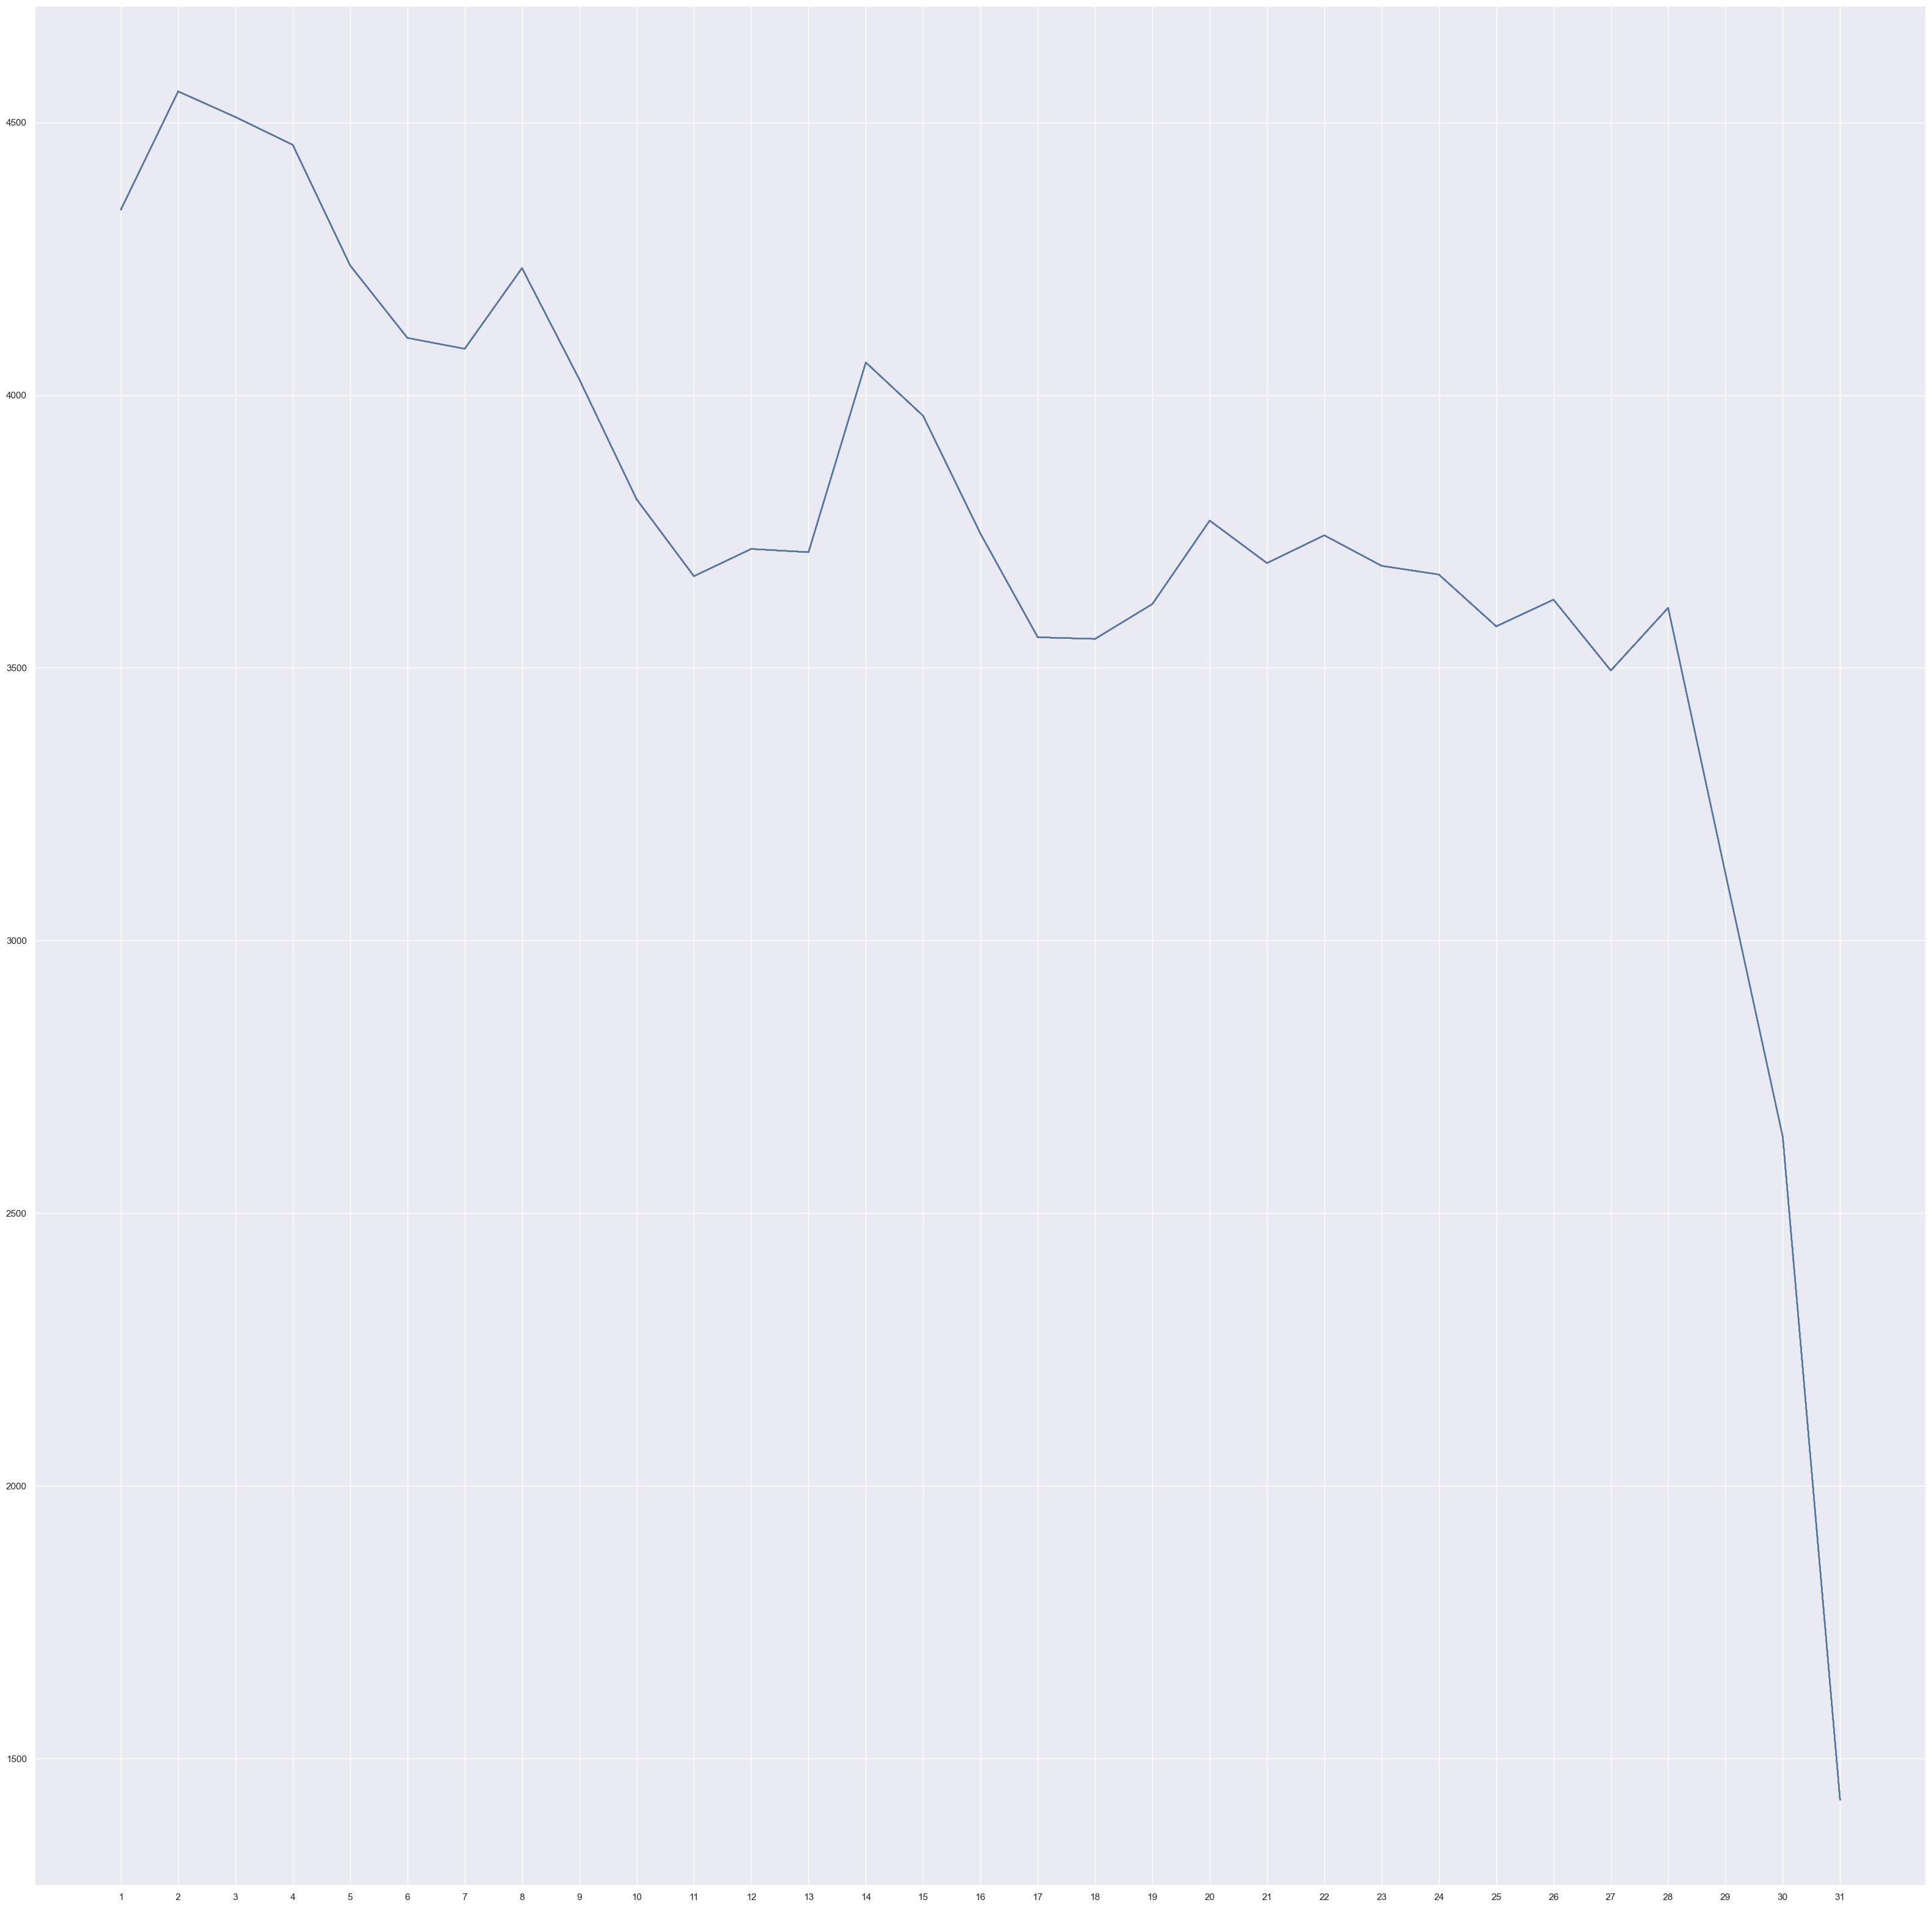

In [33]:
days = [day for day, df in Amazon_sale.groupby('Day')]
plt.plot(days, Amazon_sale.groupby(['Day']).count())
plt.xticks(days)
plt.show()

Q - at which date of month Amazon should advertized or give big sales discount to generate more revenue?
A - By looking at graph we notice that during the early days of month have more number of sales, between 2nd-7th date Amazon can advertisement for upcoming big sales. and also during 22nd-26th they can also give big discount to generate more sales for thier company. 

In [34]:
daily_sales = Amazon_sale.groupby(Amazon_sale['Date'].dt.date)['Sales'].sum().sort_values(ascending=False).head(10)

In [35]:
daily_sales.head(5)

Date
2022-05-04    1169692.0
2022-05-03    1158117.0
2022-05-02    1157597.0
2022-04-23    1075773.0
2022-04-14    1071154.0
Name: Sales, dtype: float64

In [38]:
Amazon_sale.groupby(['Day']).count()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,Sales
Day,,,,,,,,,,,,,,,,,,,,,
1,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340,...,4340,4340,4340,4340,4340,4340,4340,4340,4340,4340
2,4557,4557,4557,4557,4557,4557,4557,4557,4557,4557,...,4557,4557,4557,4557,4557,4557,4557,4557,4557,4557
3,4510,4510,4510,4510,4510,4510,4510,4510,4510,4510,...,4510,4510,4510,4510,4510,4510,4510,4510,4510,4510
4,4459,4459,4459,4459,4459,4459,4459,4459,4459,4459,...,4459,4459,4459,4459,4459,4459,4459,4459,4459,4459
5,4238,4238,4238,4238,4238,4238,4238,4238,4238,4238,...,4238,4238,4238,4238,4238,4238,4238,4238,4238,4238
6,4105,4105,4105,4105,4105,4105,4105,4105,4105,4105,...,4105,4105,4105,4105,4105,4105,4105,4105,4105,4105
7,4085,4085,4085,4085,4085,4085,4085,4085,4085,4085,...,4085,4085,4085,4085,4085,4085,4085,4085,4085,4085
8,4233,4233,4233,4233,4233,4233,4233,4233,4233,4233,...,4233,4233,4233,4233,4233,4233,4233,4233,4233,4233
9,4029,4029,4029,4029,4029,4029,4029,4029,4029,4029,...,4029,4029,4029,4029,4029,4029,4029,4029,4029,4029


<Axes: xlabel='ship-state', ylabel='Qty'>

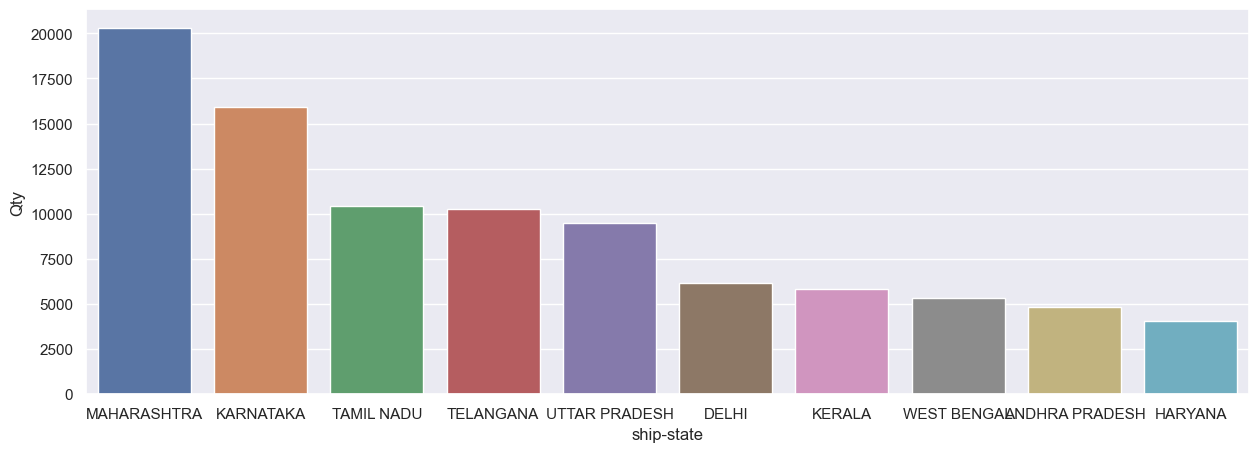

In [36]:
sales_state = Amazon_sale.groupby(['ship-state'], as_index=False)['Qty'].sum().sort_values(by = 'Qty', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x= 'ship-state', y= 'Qty')

Q - which state have more quantity sold/ordered 
A - Maharashtra has more number of Quantity sold/ordered over the Amazon. Mumbai is the capital of Maharashtra. Mumbai is widely known as the financial, commercial, and entertainment capital of India. Population and wealth(Common People"s) of Maharashtra is the main reason why they have more orders from that regieon.

<Axes: xlabel='ship-state', ylabel='Amount'>

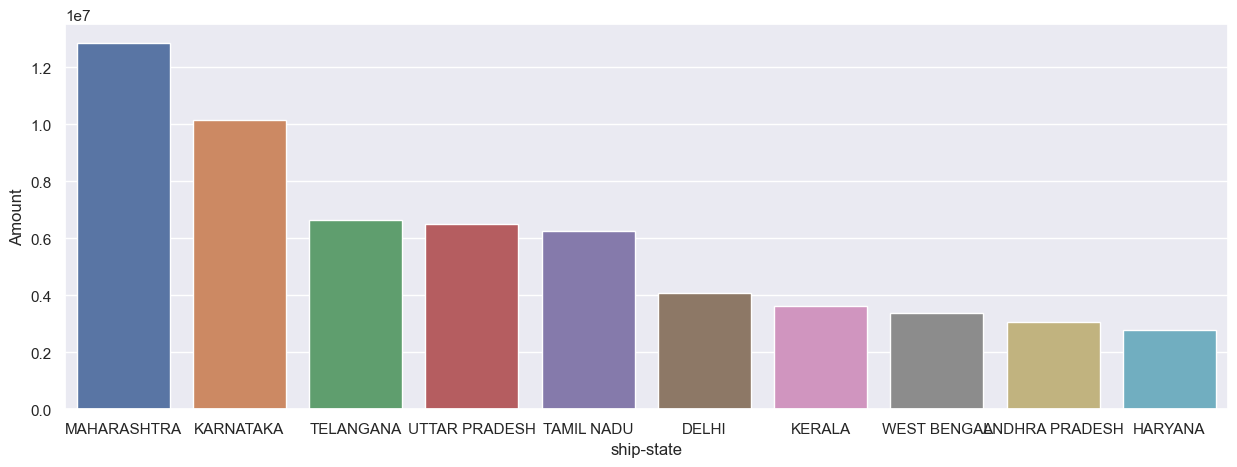

In [37]:
sales_state = Amazon_sale.groupby(['ship-state'], as_index=False)['Amount'].sum().sort_values(by = 'Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x= 'ship-state', y= 'Amount')

Q - which state have spend more amount on buying cloths from Amazon.
A - As menothined above Maharashtra has the more number of spending money on products. We can also see that Uttar pradesh has less number of Quantity orderd but they spent more amount on buying that products.

<BarContainer object of 9 artists>

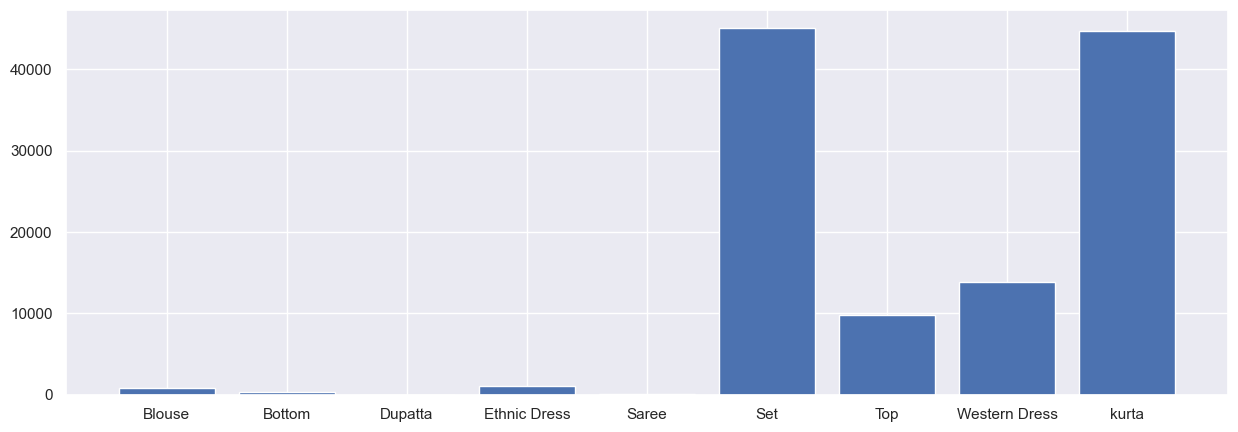

In [39]:
product_group = Amazon_sale.groupby('Category')
quantity_order = product_group.count()['Qty']

products = [product for product, df in product_group]

plt.bar(products,quantity_order)


<BarContainer object of 11 artists>

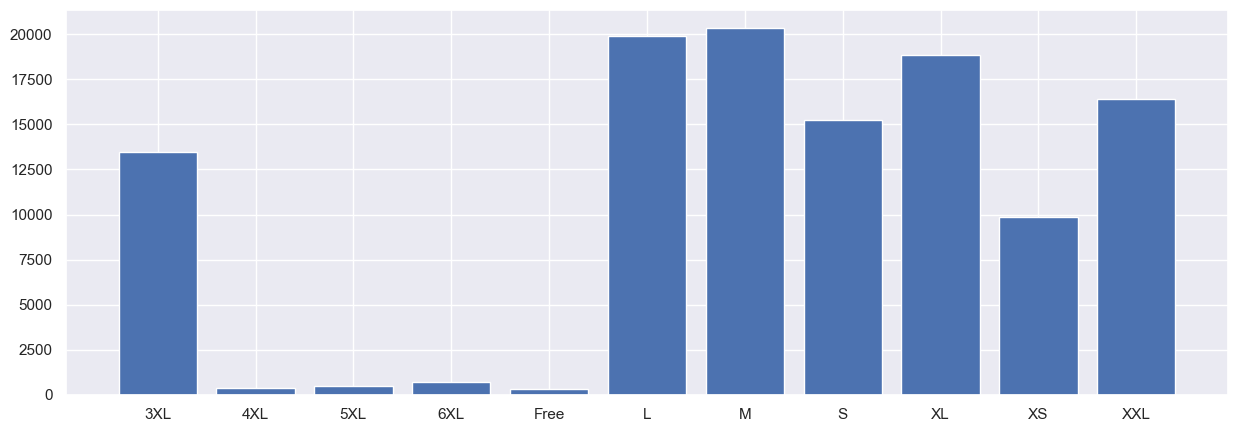

In [40]:
product_group = Amazon_sale.groupby('Size')
size_order = product_group.count()['Amount']

products = [product for product, df in product_group]

plt.bar(products,size_order)

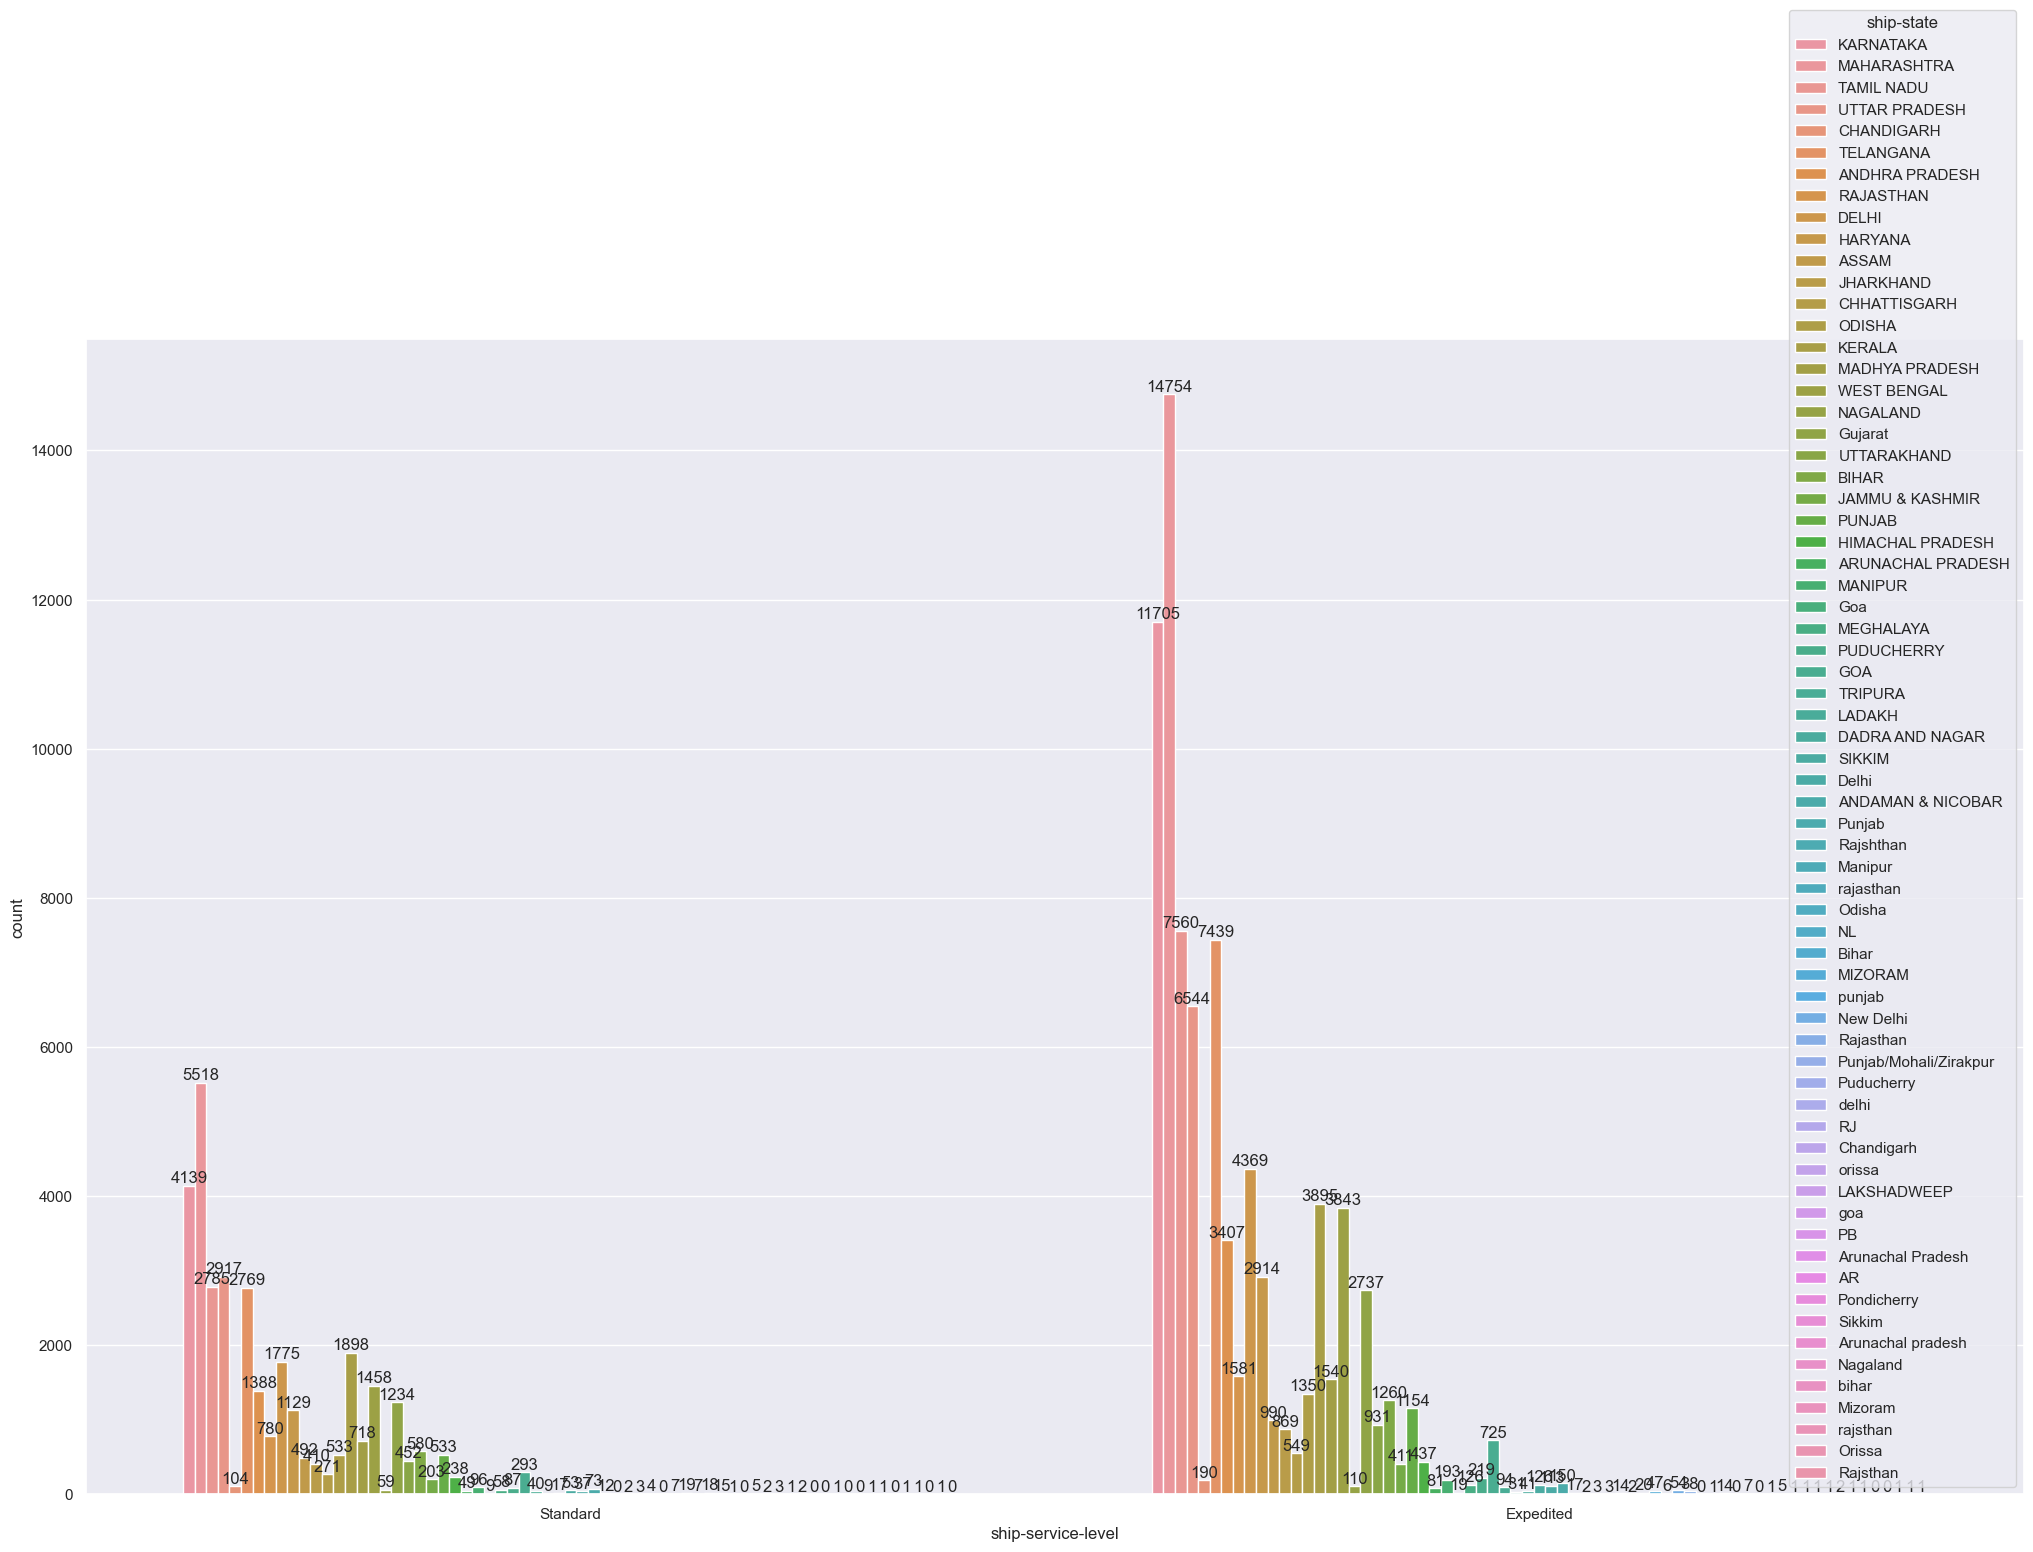

In [42]:
ax = sns.countplot(x ='ship-service-level', data = Amazon_sale, hue = 'ship-state')
sns.set(rc={'figure.figsize':(25,15)})

for bars in ax.containers:
    ax.bar_label(bars)

Expedited shipping is faster than standard shipping. While standard shipping can take anywhere from 4 to 10 business days, most expedited shipping takes between 2 to 3 days.

In [46]:
Amazon_sale.set_index('Date', inplace=True)

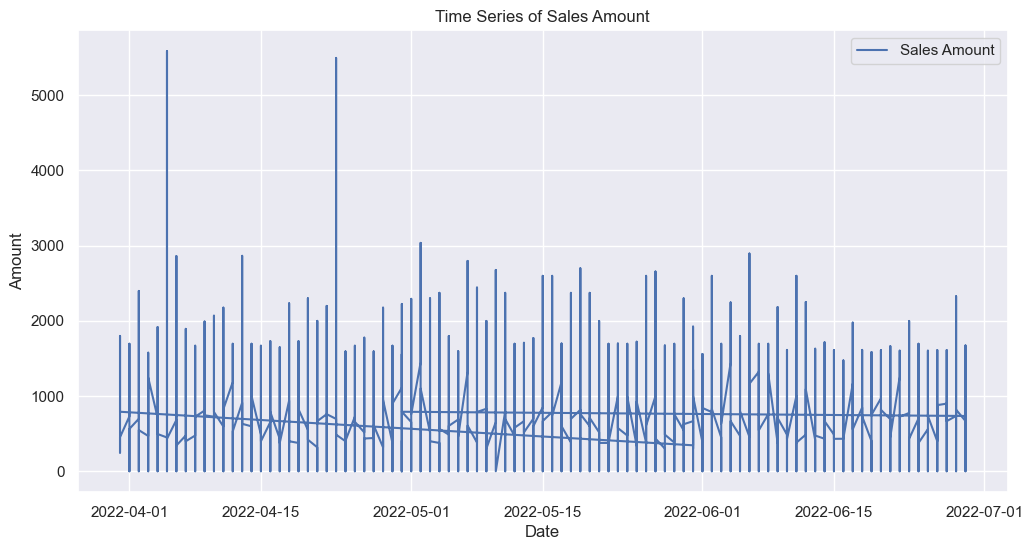

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(Amazon_sale.index, Amazon_sale['Amount'], label='Sales Amount')
plt.title('Time Series of Sales Amount')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)
plt.show()

Time series analysis for amount trends relationship over the dates.